<a href="https://colab.research.google.com/github/sebavassou/aula001py_mba/blob/main/ED_Aula06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Estatística Descritiva - Aula 06


In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import statsmodels.api as sm
import matplotlib.pyplot as plt

In [8]:
import requests

# URL do arquivo raw no GitHub
url = 'https://raw.githubusercontent.com/stefanomozart/estatistica_descritiva/main/dados/originais/exchange/exchange_rate.txt'

# Fazer o download do conteúdo do arquivo
response = requests.get(url)
content = response.text

# Separar as linhas do conteúdo
lines = content.strip().split('\n')

# Extrair os nomes das colunas da primeira linha
columns = lines[0].split(',')

# Criar uma lista de dicionários com os dados
data = []
for line in lines[1:]:
    values = line.split(',')
    row_dict = dict(zip(columns, values))
    data.append(row_dict)

# Criar o DataFrame
df = pd.DataFrame(data)

# Converter colunas para o tipo float
for col in df.columns:
    df[col] = df[col].astype(float)

# Exibir as primeiras linhas do DataFrame
print(df.head())

# Salvar o DataFrame em um arquivo CSV
df.to_csv('exchange_rates.csv', index=False)


      AUD     GBP       CAD       CHF       CNY       JPY     NZD       SGD
0  0.7855  1.6110  0.861698  0.634196  0.211242  0.006838  0.5930  0.525486
1  0.7818  1.6100  0.861104  0.633513  0.211242  0.006863  0.5940  0.523972
2  0.7867  1.6293  0.861030  0.648508  0.211242  0.006975  0.5973  0.526316
3  0.7860  1.6370  0.862069  0.650618  0.211242  0.006953  0.5970  0.523834
4  0.7849  1.6530  0.861995  0.656254  0.211242  0.006940  0.5985  0.527426


In [9]:
# Converter colunas para o tipo float
for col in df.columns:
    df[col] = df[col].astype(float)

# Regressão Linear simples

In [10]:
from sklearn.linear_model import LinearRegression

# Definindo as variáveis independentes e dependentes
X = df[['AUD']]  # Variável independente
Y = df['GBP']    # Variável dependente

# Criando o modelo de regressão linear
model = LinearRegression()
model.fit(X, Y)

# Coeficientes
slope = model.coef_[0]
intercept = model.intercept_

print(f"Coeficiente angular (slope): {slope:.4f}")
print(f"Intercepto: {intercept:.4f}")

Coeficiente angular (slope): 0.2498
Intercepto: 1.4400



##Calculo Manual

## Cálculo manual

Equação da reta: Y = 0.2498X + 1.4400
Correlação: 0.2113


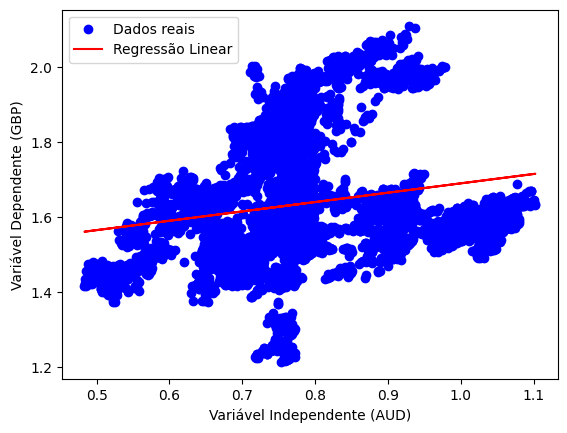

In [12]:
import numpy as np
import matplotlib.pyplot as plt

# Assumindo que df já foi criado e contém as colunas 'AUD' e 'GBP'

# Definindo as variáveis independentes e dependentes
x = df['AUD'].values  # Variável independente
y = df['GBP'].values  # Variável dependente

# Calculando médias e desvios padrão
mean_X = np.mean(x)
mean_y = np.mean(y)
sd_X = np.std(x, ddof=1)  # Desvio padrão amostral
sd_y = np.std(y, ddof=1)  # Desvio padrão amostral

# Calculando a correlação e os coeficientes da regressão
correlation = np.corrcoef(x, y)[0, 1]
slope = (correlation * sd_y) / sd_X
intercept = mean_y - slope * mean_X

print(f"Equação da reta: Y = {slope:.4f}X + {intercept:.4f}")
print(f"Correlação: {correlation:.4f}")

# Gerando a linha de regressão
y_pred = (slope * x) + intercept

# Plotando os dados reais e a linha de regressão
plt.scatter(x, y, label='Dados reais', color='blue')
plt.plot(x, y_pred, color='red', label='Regressão Linear')
plt.xlabel('Variável Independente (AUD)')
plt.ylabel('Variável Dependente (GBP)')
plt.legend()
plt.show()


In [13]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
from statsmodels.robust.robust_linear_model import RLM
from statsmodels.regression.quantile_regression import QuantReg

# Assumindo que df já foi criado e contém as colunas 'AUD' e 'GBP'

# Variáveis independentes e dependentes
X = df['AUD']
Y = df['GBP']

# Adicionando uma constante para o intercepto
X_with_const = sm.add_constant(X)

# 1. Regressão OLS (Mínimos Quadrados Ordinários)
ols_model = sm.OLS(Y, X_with_const).fit()
print("OLS:")
print(ols_model.summary())

# 2. Regressão MLE (Máxima Verossimilhança)
# OLS e MLE são equivalentes para erros normais, então usamos o mesmo modelo acima.

# 3. Regressão Huber (Modelo Robusto)
huber_model = RLM(Y, X_with_const, M=sm.robust.norms.HuberT()).fit()
print("\nHuber:")
print(huber_model.summary())

# 4. Regressão Quantílica (Quantile Regression)
quantile_model = QuantReg(Y, X_with_const).fit(q=0.5)  # Mediana (q=0.5)
print("\nQuantílico:")
print(quantile_model.summary())


OLS:
                            OLS Regression Results                            
Dep. Variable:                    GBP   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     354.4
Date:                Mon, 24 Feb 2025   Prob (F-statistic):           2.65e-77
Time:                        13:44:45   Log-Likelihood:                 3239.6
No. Observations:                7588   AIC:                            -6475.
Df Residuals:                    7586   BIC:                            -6461.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.4400      0.010    137.561    

Y = 0.8269032452984747X + 19.817359532761007




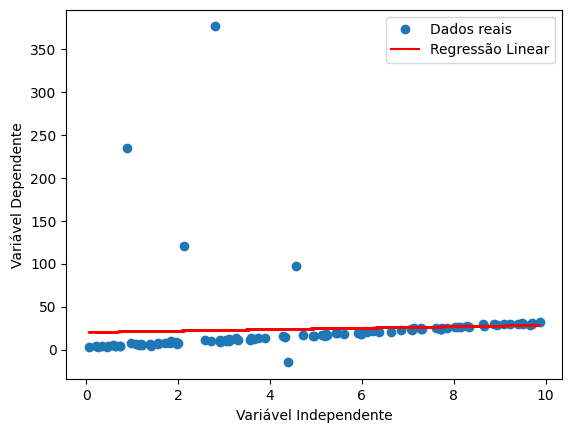

In [ ]:
# Calcular médias e desvios padrão
mean_X = np.mean(x)
mean_y = np.mean(y)
sd_X = np.std(x, ddof=1)
sd_y = np.std(y, ddof=1)

# Calcular correlação e coeficientes
correlation = np.corrcoef(x, y)[0, 1]
slope = (correlation * sd_y) / sd_X
intercept = mean_y - slope * mean_X

print(f"Y = {slope}X + {intercept}")
print("\n")

plt.scatter(x, y, label='Dados reais')
y_pred = (slope * x) + intercept
plt.plot(x, y_pred, color='red', label='Regressão Linear')
plt.xlabel('Variável Independente')
plt.ylabel('Variável Dependente')
plt.legend()
plt.show()

## Modelo OLS

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.007
Method:                 Least Squares   F-statistic:                    0.2982
Date:                Mon, 24 Feb 2025   Prob (F-statistic):              0.586
Time:                        05:39:18   Log-Likelihood:                -521.15
No. Observations:                 100   AIC:                             1046.
Df Residuals:                      98   BIC:                             1052.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         19.8174      8.413      2.356      0.0

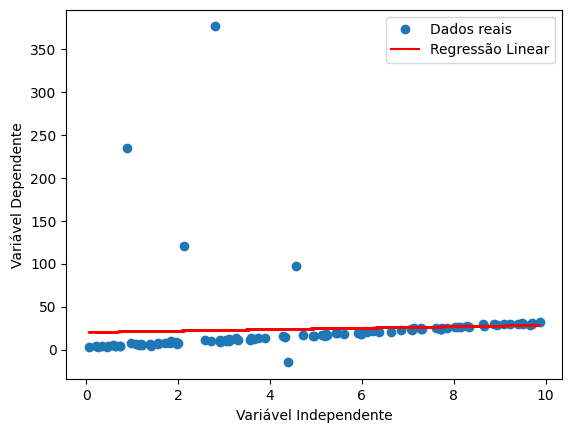

In [ ]:
# Estimação por OLS (que é MLE sob erro normal)
model = sm.OLS(y, X).fit()
print(model.summary())
print("\n")

# Fazer previsões
y_pred = model.predict(X)

# Visualizar resultados
plt.scatter(x, y, label='Dados reais')
plt.plot(x, y_pred, color='red', label='Regressão Linear')
plt.xlabel('Variável Independente')
plt.ylabel('Variável Dependente')
plt.legend()
plt.show()


## Estimação por da Máxima Verossimiliança (MLE)

Estimativas MLE:
beta0 = 19.817090297720878
beta1 = 0.8269442239599657
sigma = 44.36818589494799


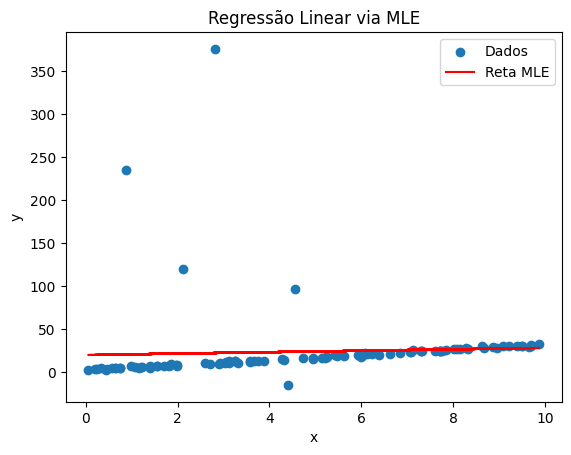

In [ ]:
import scipy.optimize as opt

# Definindo a função de log-verossimilhança negativa
# Usamos a parametrização: params = [beta0, beta1, log_sigma]
def neg_log_likelihood(params, x, y):
    beta0, beta1, log_sigma = params
    sigma = np.exp(log_sigma)  # Garante que sigma > 0
    n = len(y)
    residuals = y - (beta0 + beta1 * x)
    # Função de log-verossimilhança negativa:
    nll = 0.5 * n * np.log(2 * np.pi) + n * log_sigma + np.sum(residuals**2) / (2 * sigma**2)
    return nll

# Chute inicial para [beta0, beta1, log_sigma]
initial_guess = [0, 0, 0]

# Minimiza a log-verossimilhança negativa
result = opt.minimize(neg_log_likelihood, initial_guess, args=(x, y))

beta0_hat, beta1_hat, log_sigma_hat = result.x
sigma_hat = np.exp(log_sigma_hat)

print("Estimativas MLE:")
print("beta0 =", beta0_hat)
print("beta1 =", beta1_hat)
print("sigma =", sigma_hat)

# Visualização dos dados e da reta ajustada
plt.scatter(x, y, label='Dados')
plt.plot(x, beta0_hat + beta1_hat * x, color='red', label='Reta MLE')
plt.xlabel("x")
plt.ylabel("y")
plt.legend()
plt.title("Regressão Linear via MLE")
plt.show()

## Métodos Robustos

### Regressão quantílica

In [ ]:
import statsmodels.formula.api as smf

# Cria um DataFrame com os dados
df = pd.DataFrame({'x': x, 'y': y})

# Ajusta a regressão quantílica para o quantil 0.5 (mediana)
quantile_model = smf.quantreg('y ~ x', df).fit(q=0.5)
print(quantile_model.summary())

y_pred = quantile_model.predict(x)

# Visualizar resultados
plt.scatter(x, y, label='Dados reais')
plt.plot(x, y_pred, color='red', label='Regressão Linear')
plt.xlabel('Variável Independente')
plt.ylabel('Variável Dependente')
plt.legend()
plt.show()


                         QuantReg Regression Results                          
Dep. Variable:                      y   Pseudo R-squared:               0.4238
Model:                       QuantReg   Bandwidth:                      0.9573
Method:                 Least Squares   Sparsity:                        2.476
Date:                Mon, 24 Feb 2025   No. Observations:                  100
Time:                        06:49:27   Df Residuals:                       98
                                        Df Model:                            1
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.2984      0.232      9.890      0.000       1.837       2.760
x              2.9372      0.042     70.220      0.000       2.854       3.020


### M-Estimadores de Huber

Coeficiente: [1.12829575 2.94368874]
Intercepto: 1.1283005213567343


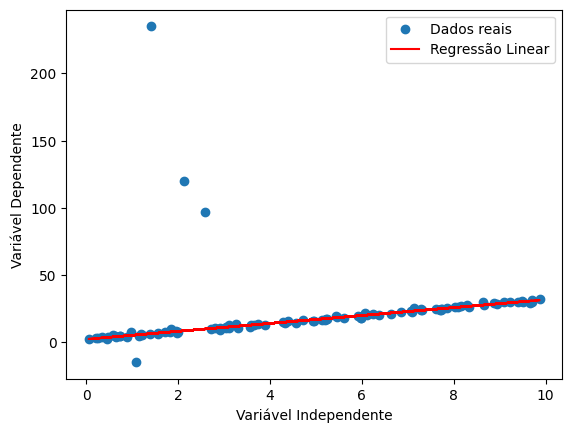

In [ ]:
from sklearn.linear_model import HuberRegressor
import numpy as np


# Regressão robusta usando Huber
huber = HuberRegressor(epsilon=1.35)
huber.fit(X, y)

# Fazer previsões
y_pred = huber.predict(X)

# Parâmetros estimados
print(f"Coeficiente: {huber.coef_}")
print(f"Intercepto: {huber.intercept_}")

# Visualizar resultados
plt.scatter(x, y, label='Dados reais')
plt.plot(x, y_pred, color='red', label='Regressão Linear')
plt.xlabel('Variável Independente')
plt.ylabel('Variável Dependente')
plt.legend()
plt.show()


### Método LAD (Least Absolute Deviation)

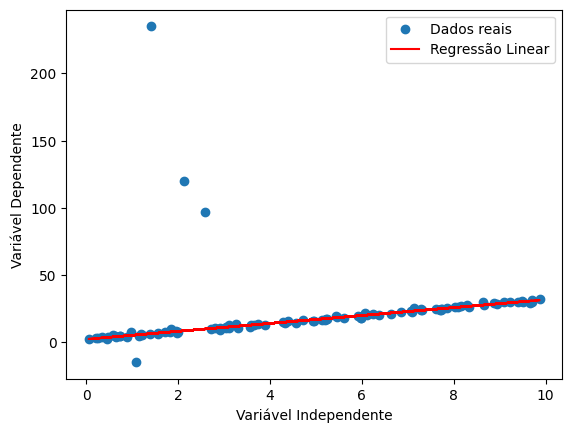

In [ ]:
from sklearn.linear_model import QuantileRegressor

# Regressão LAD (mediana)
lad = QuantileRegressor(quantile=0.5)
lad.fit(X, y)

# Previsões
y_pred_lad = lad.predict(X)

# Visualizar resultados
plt.scatter(x, y, label='Dados reais')
plt.plot(x, y_pred, color='red', label='Regressão Linear')
plt.xlabel('Variável Independente')
plt.ylabel('Variável Dependente')
plt.legend()
plt.show()


# Regressão linear multivariável

## OLS Multivariável

In [ ]:
# Gerando dados simulados
np.random.seed(42)
n = 100
X1 = np.random.rand(n)
X2 = np.random.rand(n)
# Modelo: Y = 3 + 2*X1 - 4*X2 + erro, com erro ~ N(0,1)
erro = np.random.randn(n)
Y = 3 + 2*X1 - 4*X2 + erro

# Organiza os dados em um DataFrame
df = pd.DataFrame({'Y': Y, 'X1': X1, 'X2': X2})

# Cria a matriz de regressão e adiciona o intercepto
X = df[['X1', 'X2']]
X = sm.add_constant(X)


In [ ]:
# Ajusta o modelo de regressão OLS
model = sm.OLS(df['Y'], X).fit()
print(model.summary())
print("\n")

# predição
y_pred = model.predict(X)


                            OLS Regression Results                            
Dep. Variable:                      Y   R-squared:                       0.557
Model:                            OLS   Adj. R-squared:                  0.548
Method:                 Least Squares   F-statistic:                     60.95
Date:                Mon, 24 Feb 2025   Prob (F-statistic):           7.20e-18
Time:                        08:08:32   Log-Likelihood:                -139.10
No. Observations:                 100   AIC:                             284.2
Df Residuals:                      97   BIC:                             292.0
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.9106      0.254     11.450      0.0

ValueError: cannot reshape array of size 100 into shape (100,3)

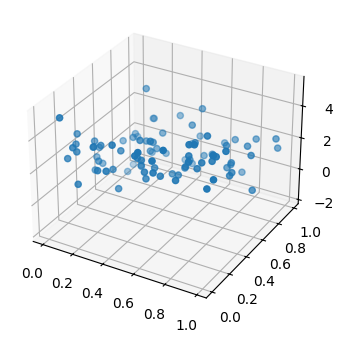

In [ ]:
plt.figure(figsize = (5, 4))
plot_axes = plt.axes(projection = '3d')
plot_axes.scatter3D(X.X1, X.X2, Y)
plot_axes.plot_surface(X.X1, X.X2, y_pred.to_numpy().reshape(X.shape)) #, rstride=1, cstride=1, alpha = 0.4)
plot_axes.set_xlabel('X1')
plot_axes.set_ylabel('X2')
plot_axes.set_zlabel('Y')

plt.show()

## MLE Multivariável

In [ ]:
# Definindo a função de log-verossimilhança negativa para o modelo multivariável
def neg_log_likelihood(params, X, y):
    # params contém [beta0, beta1, beta2, log_sigma]
    beta0, beta1, beta2, log_sigma = params
    sigma = np.exp(log_sigma)
    y_pred = beta0 + beta1 * X[:, 0] + beta2 * X[:, 1]
    n = len(y)
    residuals = y - y_pred
    nll = 0.5 * n * np.log(2 * np.pi * sigma**2) + np.sum(residuals**2) / (2 * sigma**2)
    return nll

# Organiza os dados
X_array = df[['X1', 'X2']].values
y_array = df['Y'].values

# Chute inicial para [beta0, beta1, beta2, log_sigma]
initial_guess = [0, 0, 0, 0]

result = opt.minimize(neg_log_likelihood, initial_guess, args=(X_array, y_array))
beta0_hat, beta1_hat, beta2_hat, log_sigma_hat = result.x
sigma_hat = np.exp(log_sigma_hat)

print("Estimativas MLE:")
print("beta0 =", beta0_hat)
print("beta1 =", beta1_hat)
print("beta2 =", beta2_hat)
print("sigma =", sigma_hat)

Estimativas MLE:
beta0 = 2.910609976318004
beta1 = 1.6582748606021207
beta2 = -3.2806885717213725
sigma = 0.9724565699723193


## M-estimador de Huber Multivariável

In [ ]:
# Ajusta um modelo robusto usando a função HuberT
robust_model = sm.RLM(df['Y'], X, M=sm.robust.norms.HuberT()).fit()
print(robust_model.summary())


                    Robust linear Model Regression Results                    
Dep. Variable:                      Y   No. Observations:                  100
Model:                            RLM   Df Residuals:                       97
Method:                          IRLS   Df Model:                            2
Norm:                          HuberT                                         
Scale Est.:                       mad                                         
Cov Type:                          H1                                         
Date:                Mon, 24 Feb 2025                                         
Time:                        08:01:38                                         
No. Iterations:                    17                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          2.8738      0.247     11.633      0.0

## Regressão Quantílica Multivariável

In [ ]:
import statsmodels.formula.api as smf

# Ajusta a regressão quantílica para o quantil 0.5 (mediana)
quantile_model = smf.quantreg('Y ~ X1 + X2', df).fit(q=0.5)
print(quantile_model.summary())


                         QuantReg Regression Results                          
Dep. Variable:                      Y   Pseudo R-squared:               0.3520
Model:                       QuantReg   Bandwidth:                       1.054
Method:                 Least Squares   Sparsity:                        2.706
Date:                Mon, 24 Feb 2025   No. Observations:                  100
Time:                        08:01:42   Df Residuals:                       97
                                        Df Model:                            2
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.8678      0.348      8.234      0.000       2.177       3.559
X1             1.9623      0.457      4.291      0.000       1.055       2.870
X2            -3.3832      0.464     -7.289      0.000      -4.304      -2.462


# Séries temporais


In [ ]:
# Série de exemplo: taxas de câmbio

exchange = pd.read_csv('https://github.com/stefanomozart/estatistica_descritiva/raw/refs/heads/main/dados/originais/exchange/exchange_rate.txt', low_memory=False)
display(exchange.shape)
exchange.head(3)

(7588, 8)

,AUD,GBP,CAD,CHF,CNY,JPY,NZD,SGD
0,0.7855,1.6110,0.861698,0.634196,0.211242,0.006838,0.5930,0.525486
1,0.7818,1.6100,0.861104,0.633513,0.211242,0.006863,0.5940,0.523972
2,0.7867,1.6293,0.861030,0.648508,0.211242,0.006975,0.5973,0.526316


In [ ]:
idx = pd.bdate_range(start='1990-01-01', periods=len(exchange))
exchange.index = idx
exchange.head(3)

,AUD,GBP,CAD,CHF,CNY,JPY,NZD,SGD
1990-01-01,0.7855,1.6110,0.861698,0.634196,0.211242,0.006838,0.5930,0.525486
1990-01-02,0.7818,1.6100,0.861104,0.633513,0.211242,0.006863,0.5940,0.523972
1990-01-03,0.7867,1.6293,0.861030,0.648508,0.211242,0.006975,0.5973,0.526316


<Axes: >

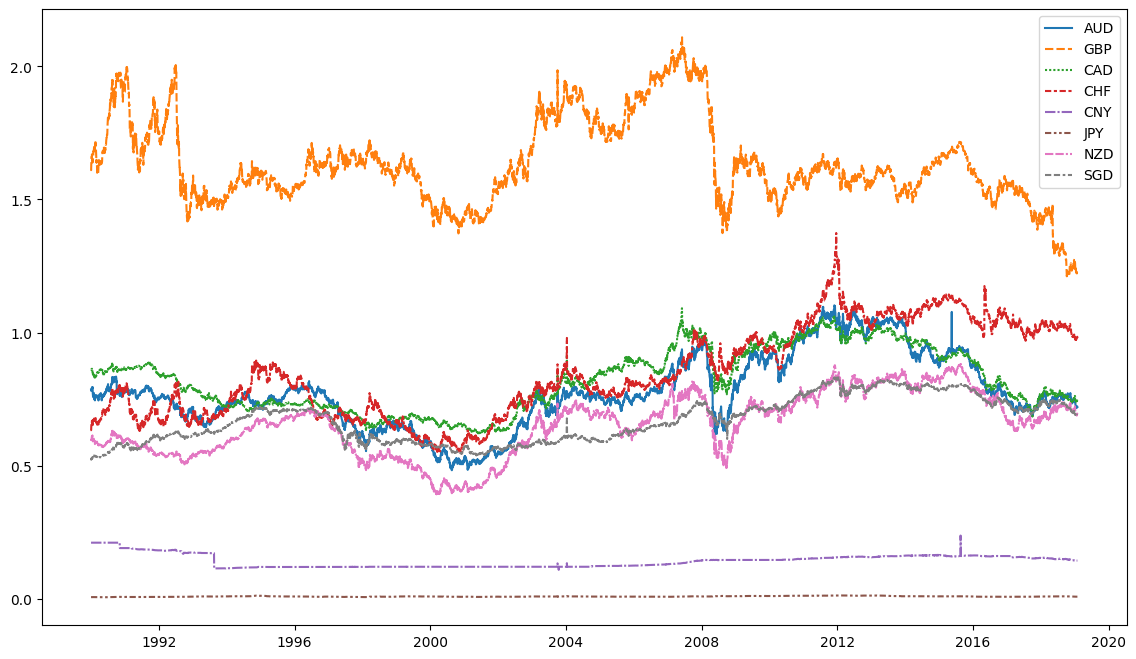

In [ ]:
plt.figure(figsize=(14, 8))
sns.lineplot(data=exchange)

<Figure size 1400x800 with 0 Axes>

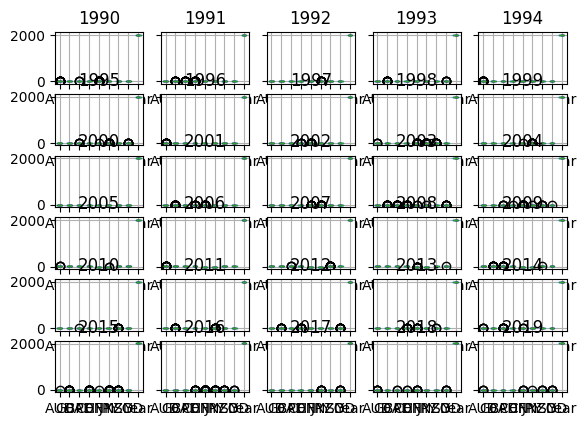

In [ ]:
plt.figure(figsize=(14, 8))

# Convert the date column to datetime objects if needed
exchange['Year'] = exchange.index.year  # Extract year

# Group the data by year and currency (each column represents a currency)
grouped = exchange.groupby('Year').boxplot()


In [ ]:
# Create a figure for the subplots
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(15, 20))
fig.suptitle('Seasonal Boxplots for Exchange Rates', fontsize=16)

# Define the currencies to plot (replace with actual column names)
currencies = ['AUD', 'GBP', 'CAD', 'CHF', 'CNY', 'JPY', 'NZD', 'SGD']

# Plot the seasonal boxplots for each currency
for i, currency in enumerate(currencies):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    grouped[1990].plot(kind='box', ax=ax, title=f'{currency} Exchange Rate')
    ax.set_ylabel('Exchange Rate')
    ax.set_xlabel('Year')
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()


## Medidas de tendência central e posição

In [ ]:
exchange.describe()

,AUD,GBP,CAD,CHF,CNY,JPY,NZD,SGD
count,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000,7588.000000
mean,0.776974,1.634105,0.821811,0.848146,0.142833,0.009343,0.654418,0.669673
std,0.136620,0.161544,0.117123,0.168874,0.023996,0.001458,0.115292,0.082836
min,0.483297,1.211534,0.618582,0.548617,0.109292,0.006254,0.393153,0.523834
25%,0.701422,1.532887,0.727901,0.696864,0.120814,0.008331,0.566000,0.593287
50%,0.761377,1.606574,0.811582,0.813959,0.145212,0.009151,0.669187,0.662767
75%,0.873477,1.707646,0.920394,1.014018,0.159948,0.009995,0.734901,0.731835
max,1.102536,2.109000,1.091524,1.374079,0.237954,0.013202,0.882379,0.832556


## Medidas de dispersão global

In [ ]:
for c in exchange.columns:
    print(f'Moeda: {c}')
    print(f'Amplitude: {exchange[c].max()-exchange[c].min()}')
    print(f'IIQ: {exchange[c].quantile(.75)-exchange[c].quantile(.25)}')
    print(f'Variância: {exchange[c].var()}')
    print(f'Desvio padrão: {exchange[c].std()}')
    print(f'Coeficiente de variação: {exchange[c].std()/exchange[c].mean()}')
    print("\n")

Moeda: AUD
Amplitude: 0.619239
IIQ: 0.17205499999999996
Variância: 0.01866513878147911
Desvio padrão: 0.13662041861112528
Coeficiente de variação: 0.17583661949473453


Moeda: GBP
Amplitude: 0.8974659999999999
IIQ: 0.17475850000000004
Variância: 0.026096540761994153
Desvio padrão: 0.1615442377864161
Coeficiente de variação: 0.0988579458690571


Moeda: CAD
Amplitude: 0.472942
IIQ: 0.19249275
Variância: 0.013717844900986568
Desvio padrão: 0.11712320393921338
Coeficiente de variação: 0.14251844817393286


Moeda: CHF
Amplitude: 0.825462
IIQ: 0.3171535
Variância: 0.028518322146798083
Desvio padrão: 0.16887368695802815
Coeficiente de variação: 0.1991092574351717


Moeda: CNY
Amplitude: 0.128662
IIQ: 0.03913425000000001
Variância: 0.0005758282361022045
Desvio padrão: 0.023996421318650922
Coeficiente de variação: 0.16800361337473213


Moeda: JPY
Amplitude: 0.006948
IIQ: 0.0016640000000000005
Variância: 2.125033749923141e-06
Desvio padrão: 0.0014577495497934963
Coeficiente de variação: 0.156030

## Medidas especícas de séries temporais



### Autocorrelação

In [ ]:
from statsmodels.tsa.stattools import acf, pacf

for c in exchange.columns:
    print(f'Moeda: {c}')
    print(f'Autocorrelação: {acf(exchange[c])[1]}')
    print(f'Autocorrelação parcial: {pacf(exchange[c])[1]}')
    print("\n")


Moeda: AUD
Autocorrelação: 0.9990084919365393
Autocorrelação parcial: 0.9991401656536788


Moeda: GBP
Autocorrelação: 0.9976640819674364
Autocorrelação parcial: 0.9977955784854232


Moeda: CAD
Autocorrelação: 0.9992298838294003
Autocorrelação parcial: 0.9993615867269656


Moeda: CHF
Autocorrelação: 0.9991321762196863
Autocorrelação parcial: 0.9992638662389582


Moeda: CNY
Autocorrelação: 0.9975536809873442
Autocorrelação parcial: 0.9976851629539961


Moeda: JPY
Autocorrelação: 0.9988065774956993
Autocorrelação parcial: 0.9989382245996266


Moeda: NZD
Autocorrelação: 0.9990843592714065
Autocorrelação parcial: 0.9992160429881947


Moeda: SGD
Autocorrelação: 0.9992800396933539
Autocorrelação parcial: 0.9994117492016833




### Medidas móveis

In [ ]:
# Using pandas
for c in exchange.columns:
    print(f'Moeda: {c}')
    print(f'Média móvel: {exchange[c].rolling(window=365).mean().describe()}')
    print(f'Desvio padrão móvel: {exchange[c].rolling(window=365).std().describe()}')
    print("\n\n")

Moeda: AUD
Média móvel: count    7224.000000
mean        0.777649
std         0.132870
min         0.519888
25%         0.705065
50%         0.758465
75%         0.868167
max         1.044174
Name: AUD, dtype: float64
Desvio padrão móvel: count    7224.000000
mean        0.037678
std         0.022342
min         0.013111
25%         0.021941
50%         0.031211
75%         0.048597
max         0.121150
Name: AUD, dtype: float64



Moeda: GBP
Média móvel: count    7224.000000
mean        1.639062
std         0.134649
min         1.354691
25%         1.558566
50%         1.597842
75%         1.722053
max         1.995106
Name: GBP, dtype: float64
Desvio padrão móvel: count    7224.000000
mean        0.062909
std         0.041729
min         0.020737
25%         0.033419
50%         0.051379
75%         0.072779
max         0.237544
Name: GBP, dtype: float64



Moeda: CAD
Média móvel: count    7224.000000
mean        0.822527
std         0.115395
min         0.637445
25%         0.729039

### Correlograma

<Figure size 1000x400 with 0 Axes>

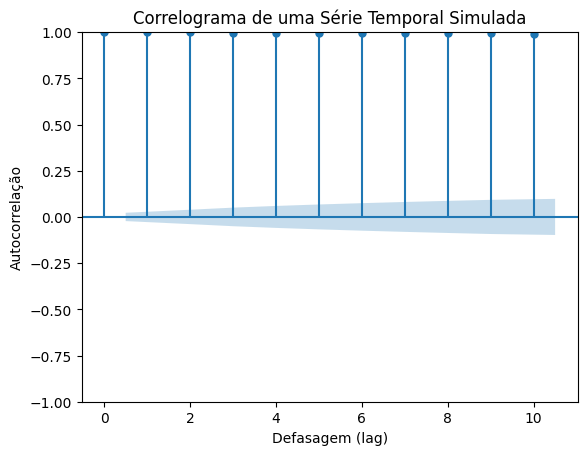

In [ ]:
from statsmodels.graphics.tsaplots import plot_acf

# Plot do correlograma
plt.figure(figsize=(10, 4))
plot_acf(exchange.AUD, lags=10)
plt.title("Correlograma de uma Série Temporal Simulada")
plt.xlabel("Defasagem (lag)")
plt.ylabel("Autocorrelação")
plt.show()

<ipython-input-93-0e897817277d>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  dates = pd.date_range(start='2020-01-01', periods=36, freq='M')


<Figure size 1000x400 with 0 Axes>

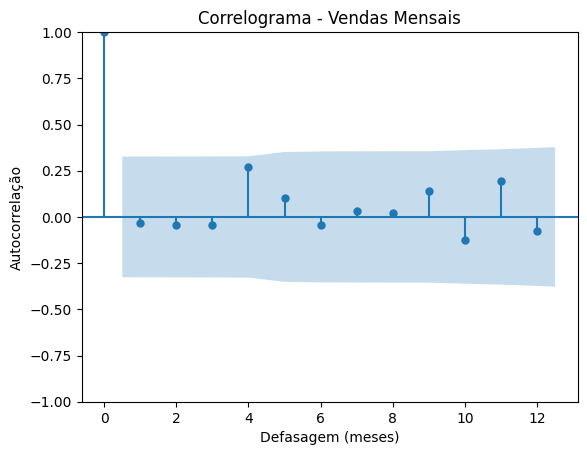

In [ ]:
# Exemplo com dados reais: Série de vendas mensais simulada
dates = pd.date_range(start='2020-01-01', periods=36, freq='M')
sales = 100 + np.random.normal(0, 10, len(dates)) + np.linspace(0, 20, len(dates))  # tendência linear + ruído
sales_series = pd.Series(sales, index=dates)

# Plot do correlograma para a série de vendas
plt.figure(figsize=(10, 4))
plot_acf(sales_series, lags=12)
plt.title("Correlograma - Vendas Mensais")
plt.xlabel("Defasagem (meses)")
plt.ylabel("Autocorrelação")
plt.show()


## Teste de estacionariedade

In [ ]:
from statsmodels.tsa.stattools import adfuller

for c in exchange.columns:
    print(f'Moeda: {c}')
    adf_test = adfuller(exchange[c])
    print(f'ADF Statistic: {adf_test[0]}')
    print(f'p-value: {adf_test[1]}')
    print("\n")


Moeda: AUD
ADF Statistic: -1.6649941807382342
p-value: 0.4492327353597477


Moeda: GBP
ADF Statistic: -2.149717962088461
p-value: 0.22499806368396247


Moeda: CAD
ADF Statistic: -1.3525721700863078
p-value: 0.6047908050419996


Moeda: CHF
ADF Statistic: -1.586708005712345
p-value: 0.4902670129297461


Moeda: CNY
ADF Statistic: -2.869173949084298
p-value: 0.049051871625237504


Moeda: JPY
ADF Statistic: -2.120120776577263
p-value: 0.23650127824822065


Moeda: NZD
ADF Statistic: -1.7281970592795124
p-value: 0.4166461724183502


Moeda: SGD
ADF Statistic: -1.7477346529474402
p-value: 0.40670097211577794


Moeda: Year
ADF Statistic: -0.025333648275903745
p-value: 0.9563861903578328




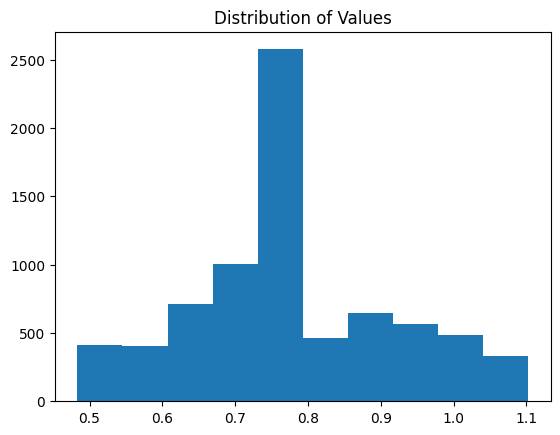

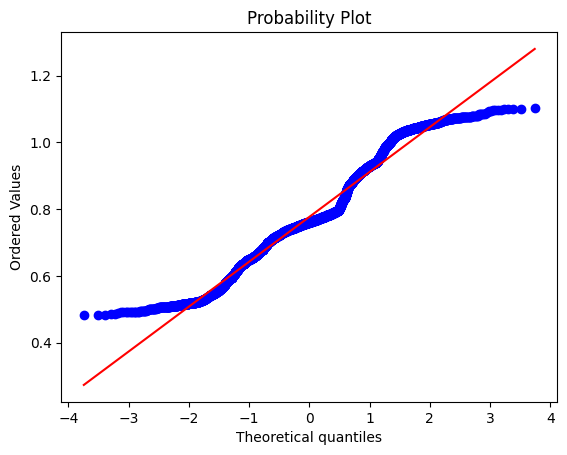

In [ ]:
# Histograma
plt.hist(exchange.AUD)
plt.title('Distribution of Values')
plt.show()

# QQ Plot
from scipy import stats
stats.probplot(exchange.AUD, dist="norm", plot=plt)
plt.show()

## Decomposição

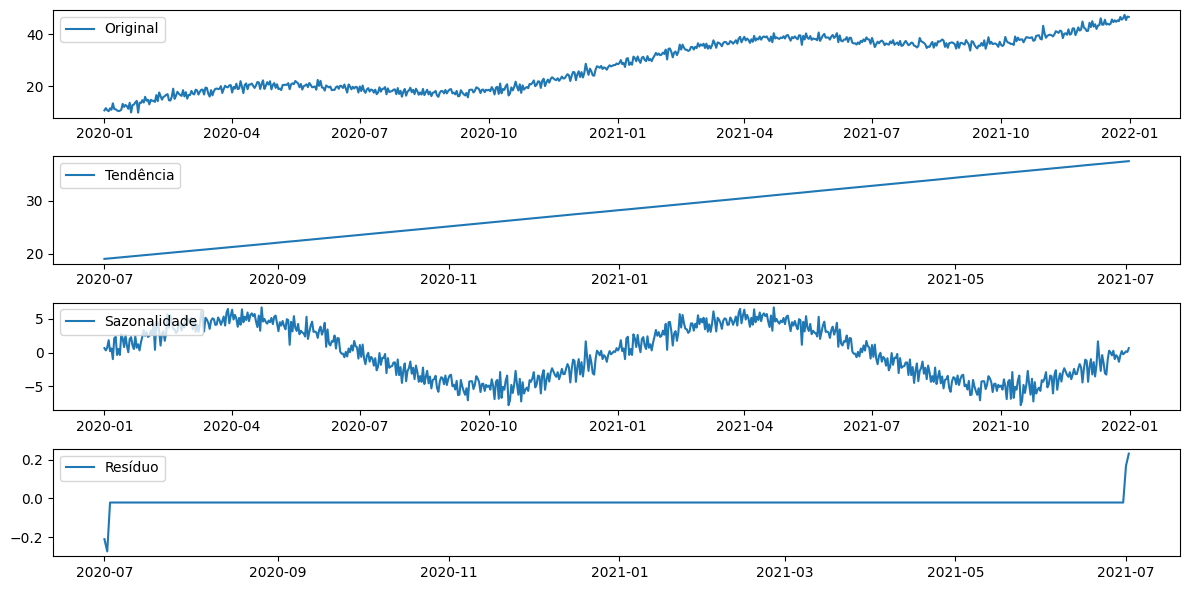

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

# Cria um índice de datas
date_rng = pd.date_range(start='2020-01-01', end='2021-12-31', freq='D')

# Cria um array de tempo (0, 1, 2, ..., N-1)
time = np.arange(len(date_rng))

# Série temporal simulada com tendência, sazonalidade e ruído
data = pd.Series(0.05 * time + 10 + 5 * np.sin(2 * np.pi * time / 365) + np.random.normal(0, 1, len(date_rng)), index=date_rng)

# Decomposição da série (modelo aditivo)
decomposition = seasonal_decompose(data, model='additive', period=365)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot dos componentes
plt.figure(figsize=(12, 6))
plt.subplot(411)
plt.plot(data, label='Original')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Tendência')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal, label='Sazonalidade')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual, label='Resíduo')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()


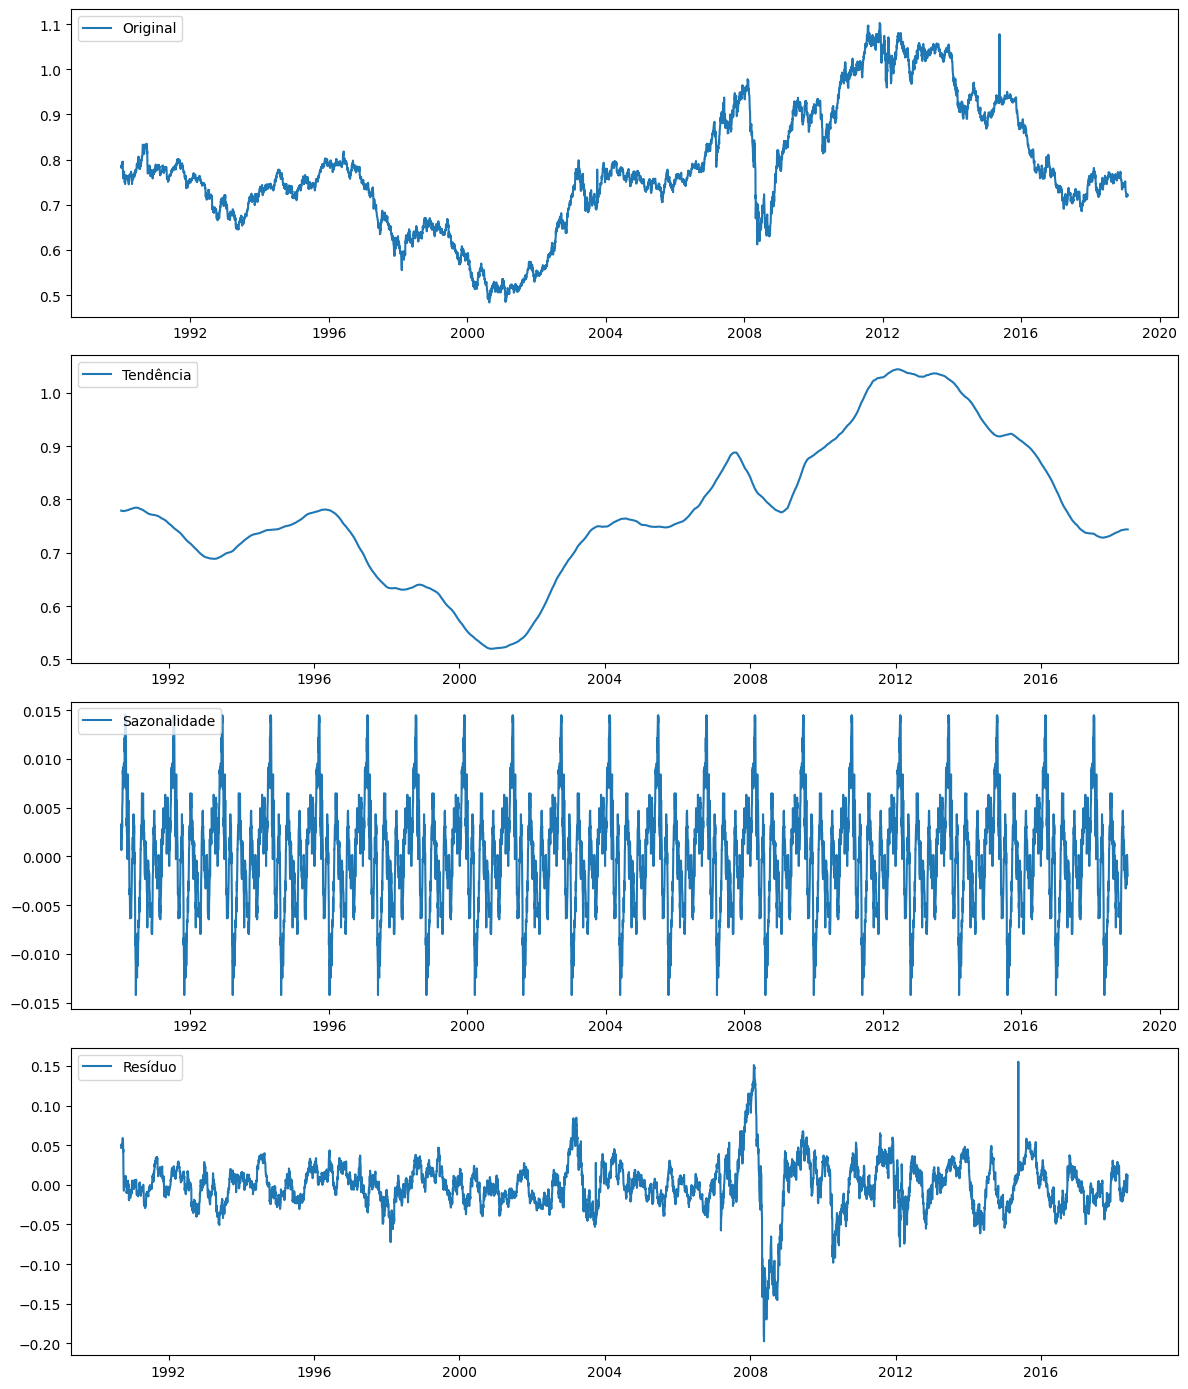

In [ ]:
from statsmodels.tsa.seasonal import seasonal_decompose

decomposition = seasonal_decompose(exchange.AUD, period=365)
trend = decomposition.trend
seasonal = decomposition.seasonal
residual = decomposition.resid

# Plot dos componentes
plt.figure(figsize=(12, 14))
plt.subplot(411)
plt.plot(exchange.AUD, label='Original')
plt.legend(loc='upper left')
plt.subplot(412)
plt.plot(trend, label='Tendência')
plt.legend(loc='upper left')
plt.subplot(413)
plt.plot(seasonal, label='Sazonalidade')
plt.legend(loc='upper left')
plt.subplot(414)
plt.plot(residual, label='Resíduo')
plt.legend(loc='upper left')
plt.tight_layout()
plt.show()

## Modelos predidtivos



### ARIMA

In [ ]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error

modelo_arima = ARIMA(exchange.AUD)
modelo_arima_fit = modelo_arima.fit()

previsoes_arima = modelo_arima_fit.predict(start='2015-01-01', end='2017-06-30', typ='levels')

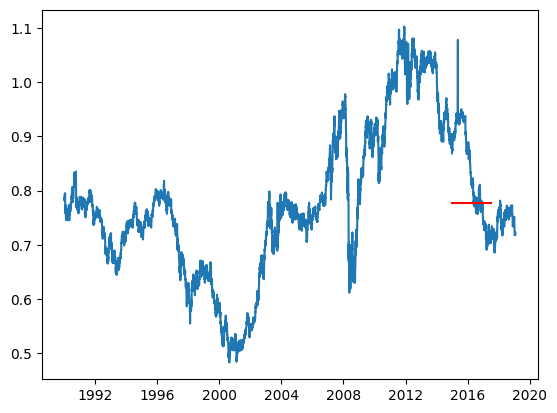

In [ ]:
plt.plot(exchange.AUD)
plt.plot(previsoes_arima, color='red')
plt.show()

In [ ]:
passageiros = pd.read_csv('https://raw.githubusercontent.com/stefanomozart/estatistica_descritiva/refs/heads/main/dados/originais/airline_passengers/airline_passengers.csv', parse_dates=['Month'], index_col='Month')
passageiros.head(3)

,Passengers
Month,
1949-01-01,112
1949-02-01,118
1949-03-01,132


/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency MS will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.11/dist-packages/statsmodels/base/model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


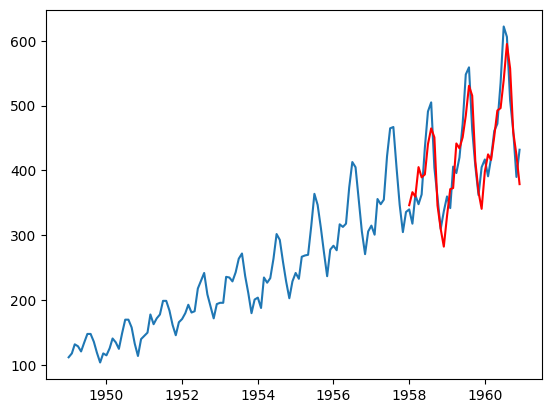

In [ ]:
modelo_arima = ARIMA(passageiros, order=(2,1,2))
modelo_arima_fit = modelo_arima.fit()

previsoes_arima = modelo_arima_fit.predict(start='1958-01-01', end='1960-12-01', typ='levels')

plt.plot(passageiros)
plt.plot(previsoes_arima, color='red')
plt.show()

In [ ]:
rmse_arima = mean_squared_error(passageiros['1958-01-01':], previsoes_arima)
print(f'RMSE do modelo ARIMA: {rmse_arima:.2f}')

RMSE do modelo ARIMA: 1437.74


### Prophet

In [ ]:
from prophet import Prophet
from prophet.diagnostics import cross_validation, performance_metrics

modelo_prophet = Prophet()
aud = exchange[['AUD']]
aud['ds'] = exchange.index
aud.columns = ['ds', 'y']
modelo_prophet.fit(aud)

<ipython-input-79-5aeaf9dc3c98>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  aud['ds'] = exchange.index
INFO:prophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp2z8fw_z/_qw2sbyl.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp2z8fw_z/3d1nlajx.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=36905', 'data', 'f

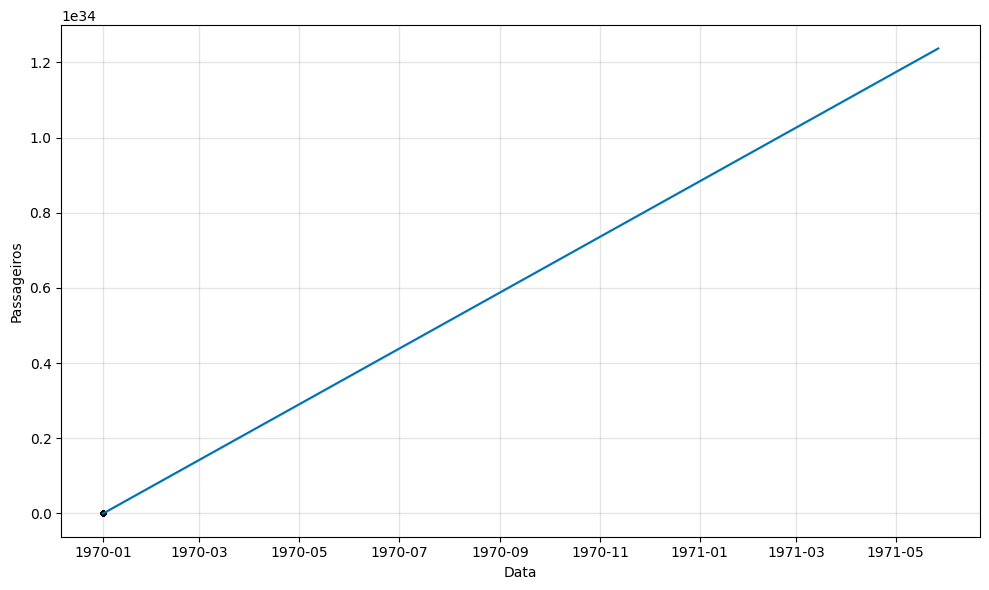

In [ ]:
futuro = modelo_prophet.make_future_dataframe(periods=365, freq='B')
previsoes_prophet = modelo_prophet.predict(futuro)
modelo_prophet.plot(previsoes_prophet, xlabel='Data', ylabel='Passageiros', uncertainty=True)
plt.show()

In [ ]:
# Dataframe passengers

pdf = pd.DataFrame()
pdf['y'] = passageiros.Passengers
pdf['ds'] = passageiros.index
pdf.head()

,y,ds
Month,,
1949-01-01,112,1949-01-01
1949-02-01,118,1949-02-01
1949-03-01,132,1949-03-01
1949-04-01,129,1949-04-01
1949-05-01,121,1949-05-01


INFO:prophet:Disabling weekly seasonality. Run prophet with weekly_seasonality=True to override this.
INFO:prophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp2z8fw_z/vawzol6k.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp2z8fw_z/kb8pp4we.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=89572', 'data', 'file=/tmp/tmpp2z8fw_z/vawzol6k.json', 'init=/tmp/tmpp2z8fw_z/kb8pp4we.json', 'output', 'file=/tmp/tmpp2z8fw_z/prophet_modelgb3af1qd/prophet_model-20250224083928.csv', 'method=optimize', 'algorithm=lbfgs', 'iter=10000']
08:39:28 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:39:28 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
/usr/local/lib/python3.11/dist-packages/

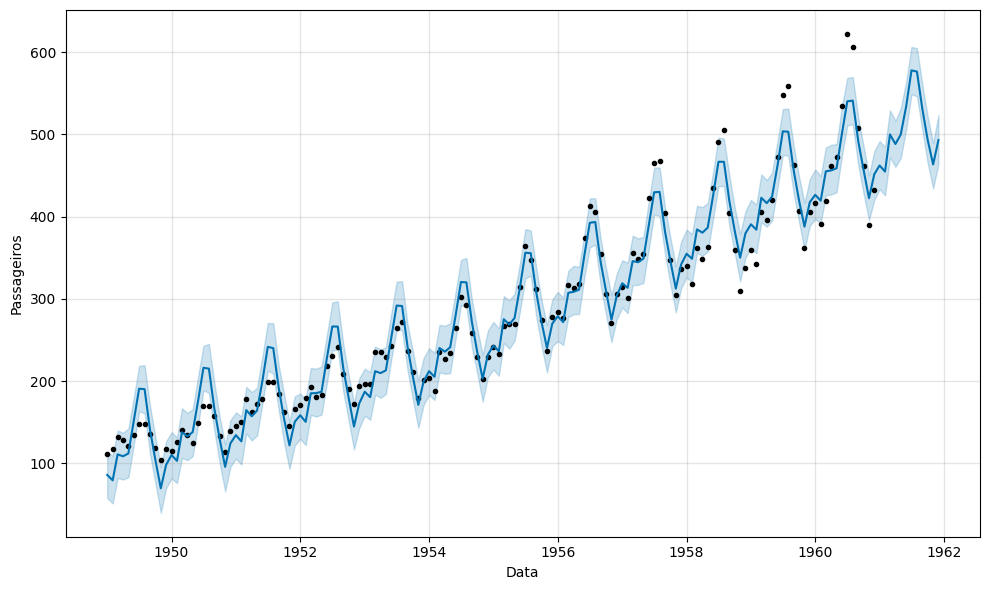

In [ ]:
modelo_prophet = Prophet()
modelo_prophet.fit(pdf)

futuro = modelo_prophet.make_future_dataframe(periods=12, freq='M')
previsoes_prophet = modelo_prophet.predict(futuro)

modelo_prophet.plot(previsoes_prophet, xlabel='Data', ylabel='Passageiros', uncertainty=True)
plt.show()

In [ ]:
df_cv = cross_validation(modelo_prophet, initial='730 days', period='180 days', horizon='365 days')
df_pm = performance_metrics(df_cv)
rmse_prophet = df_pm['rmse'].values[0]
print(f'RMSE do modelo Prophet: {rmse_prophet:.2f}')

INFO:prophet:Making 19 forecasts with cutoffs between 1951-01-18 00:00:00 and 1959-12-02 00:00:00


  0%|          | 0/19 [00:00<?, ?it/s]

INFO:prophet:n_changepoints greater than number of observations. Using 19.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp2z8fw_z/6f3ld2bi.json
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp2z8fw_z/8y5yys8b.json
DEBUG:cmdstanpy:idx 0
DEBUG:cmdstanpy:running CmdStan, num_threads: None
DEBUG:cmdstanpy:CmdStan args: ['/usr/local/lib/python3.11/dist-packages/prophet/stan_model/prophet_model.bin', 'random', 'seed=75705', 'data', 'file=/tmp/tmpp2z8fw_z/6f3ld2bi.json', 'init=/tmp/tmpp2z8fw_z/8y5yys8b.json', 'output', 'file=/tmp/tmpp2z8fw_z/prophet_modeludtxwcb8/prophet_model-20250224083941.csv', 'method=optimize', 'algorithm=newton', 'iter=10000']
08:39:41 - cmdstanpy - INFO - Chain [1] start processing
INFO:cmdstanpy:Chain [1] start processing
08:40:02 - cmdstanpy - INFO - Chain [1] done processing
INFO:cmdstanpy:Chain [1] done processing
INFO:prophet:n_changepoints greater than number of observations. Using 23.
DEBUG:cmdstanpy:input tempfile: /tmp/tmpp2z8fw_z/f8yxbiaq.json
DEBUG:cmdstanpy:input tempfi

RMSE do modelo Prophet: 33.01


## Modelo Engle-Granger

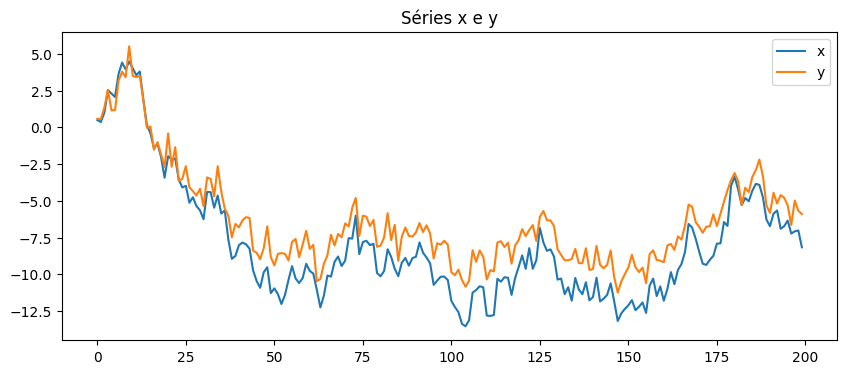

Teste de Cointegração Engle-Granger:
Estatística: -14.925249667904765
p-valor: 1.1937508721406984e-26
-> As séries são cointegradas.

Modelo de Correção de Erro (ECM):
                            OLS Regression Results                            
Dep. Variable:                     dy   R-squared:                       0.782
Model:                            OLS   Adj. R-squared:                  0.780
Method:                 Least Squares   F-statistic:                     352.4
Date:                Mon, 24 Feb 2025   Prob (F-statistic):           1.23e-65
Time:                        08:58:48   Log-Likelihood:                -139.42
No. Observations:                 199   AIC:                             284.8
Df Residuals:                     196   BIC:                             294.7
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                 coef    std err          

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.tsa.stattools import coint

# Gerando duas séries cointegradas
np.random.seed(42)
n = 200
t = np.arange(n)
# Série x como passeio aleatório
x = np.cumsum(np.random.normal(size=n))
# Série y cointegrada com x: y = 0.8*x + ruído
noise = np.random.normal(scale=0.5, size=n)
y = 0.8 * x + noise

data = pd.DataFrame({'x': x, 'y': y})
plt.figure(figsize=(10, 4))
plt.plot(data['x'], label='x')
plt.plot(data['y'], label='y')
plt.legend()
plt.title("Séries x e y")
plt.show()

# Passo 1: Teste de Cointegração Engle–Granger
score, pvalue, _ = coint(data['y'], data['x'])
print("Teste de Cointegração Engle-Granger:")
print("Estatística:", score)
print("p-valor:", pvalue)
if pvalue < 0.05:
    print("-> As séries são cointegradas.")
else:
    print("-> As séries NÃO são cointegradas.")

# Passo 2: Modelo de Correção de Erro (ECM)
# Regressão de longo prazo
X = sm.add_constant(data['x'])
long_run_model = sm.OLS(data['y'], X).fit()
data['error'] = long_run_model.resid

# Calcula as diferenças (variações de curto prazo)
data['dy'] = data['y'].diff()
data['dx'] = data['x'].diff()
data['lag_error'] = data['error'].shift(1)

# Remove as linhas com NaN (por conta das diferenças e defasagens)
ecm_data = data.dropna()

# Ajusta o ECM: Δy_t = α * (erro defasado) + γ * Δx_t + ε_t
ecm_model = sm.OLS(ecm_data['dy'], sm.add_constant(ecm_data[['lag_error', 'dx']])).fit()
print("\nModelo de Correção de Erro (ECM):")
print(ecm_model.summary())


## Modelo VECM

In [ ]:
from statsmodels.tsa.vector_ar.vecm import VECM
import matplotlib.pyplot as plt

# Gerando um exemplo simples com duas séries cointegradas (já usamos 'x' e 'y' antes)
vecm_data = data[['x', 'y']].dropna()

# Estimamos um VECM. O parâmetro k_ar_diff define o número de defasagens das diferenças,
# e coint_rank determina o número de relações de cointegração (aqui, 1, se confirmamos com Engle-Granger).
vecm_model = VECM(vecm_data, k_ar_diff=1, coint_rank=1)
vecm_fit = vecm_model.fit()

print("Resumo do VECM:")
print(vecm_fit.summary())

# Podemos também usar o VECM para previsão:
forecast = vecm_fit.predict(steps=5)
print("\nPrevisões para os próximos 5 períodos:")
print(forecast)


Resumo do VECM:
Det. terms outside the coint. relation & lagged endog. parameters for equation x
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
L1.x          -0.0871      0.125     -0.694      0.488      -0.333       0.159
L1.y           0.0412      0.134      0.307      0.759      -0.222       0.304
Det. terms outside the coint. relation & lagged endog. parameters for equation y
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
L1.x          -0.0272      0.126     -0.217      0.828      -0.274       0.219
L1.y           0.0112      0.134      0.083      0.934      -0.252       0.274
                 Loading coefficients (alpha) for equation x                  
                 coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------